<a href="https://colab.research.google.com/github/arddhanaza/foodprint-bangkit-capstone/blob/machine_learning/Model_Training_Capstone_ind_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
root_path = '/drive/MyDrive/datasets'
DIR_DATA = '/content/drive/MyDrive/datasets/ind_food_split/'


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import tensorflow as tf
print(tf.__version__)
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as note_book_tqdm

note_book_tqdm.pandas(desc='progress: ')

2.5.0


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<function matplotlib.pyplot.show>

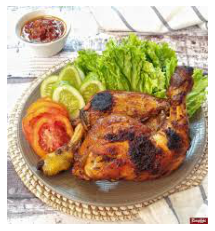

In [12]:
#Show the Image

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

img = mpimg.imread('/content/drive/MyDrive/datasets/ind_data_split/train/ayam_goreng_bakar/ayambakar001.jpg')
plt.imshow(img)
plt.axis('Off')
plt.show


In [13]:
#Make a Model

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/datasets/ind_data_split/train/',
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode="categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/datasets/ind_data_split/val/',
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/datasets/ind_data_split/test/',
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode="categorical"
)

Found 1789 images belonging to 8 classes.
Found 221 images belonging to 8 classes.
Found 229 images belonging to 8 classes.


In [14]:
#Learn a Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(256, (3,3),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(256, (3,3),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),


  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(8,activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 256)      

In [15]:
#Testing
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=10,validation_data=test_generator,verbose=1,validation_steps=3)
history = model.fit(train_generator, epochs=100,steps_per_epoch=50,validation_data=validation_generator,verbose=1,validation_steps=5)



Epoch 1/100
50/50 [==============================] - 617s 12s/step - loss: 2.0680 - accuracy: 0.2023 - val_loss: 1.8782 - val_accuracy: 0.2188
Epoch 2/100
50/50 [==============================] - 64s 1s/step - loss: 1.8765 - accuracy: 0.2142 - val_loss: 1.8062 - val_accuracy: 0.3562
Epoch 3/100
50/50 [==============================] - 17s 328ms/step - loss: 1.8511 - accuracy: 0.3000 - val_loss: 1.6784 - val_accuracy: 0.3812
Epoch 4/100
50/50 [==============================] - 12s 232ms/step - loss: 1.7481 - accuracy: 0.3237 - val_loss: 1.6063 - val_accuracy: 0.4375
Epoch 5/100
50/50 [==============================] - 11s 224ms/step - loss: 1.6932 - accuracy: 0.3932 - val_loss: 1.6331 - val_accuracy: 0.3750
Epoch 6/100
50/50 [==============================] - 11s 218ms/step - loss: 1.6335 - accuracy: 0.3919 - val_loss: 1.4280 - val_accuracy: 0.4812
Epoch 7/100
50/50 [==============================] - 11s 218ms/step - loss: 1.5635 - accuracy: 0.4195 - val_loss: 1.8070 - val_accuracy: 0.3

In [19]:
model.evaluate(test_generator)

8/8 [==============================] - 65s 9s/step - loss: 1.0026 - accuracy: 0.6856


[1.0026319026947021, 0.6855894923210144]

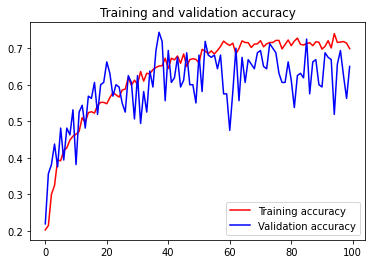

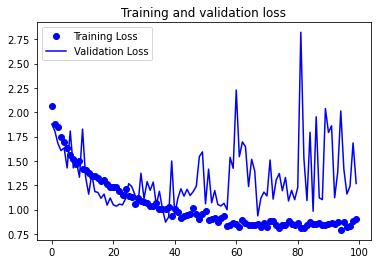

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [17]:
model.save('model_1_ind_food_data')

INFO:tensorflow:Assets written to: model_1_ind_food_data/assets


In [1]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving download (17).jpg to download (17).jpg


NameError: ignored